In [45]:
#Installing libaries

# Data Collection


In [46]:
!pip install ultralytics -q
!pip install pyyaml -q.


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -.


In [47]:
from ultralytics import YOLO
import yaml

In [48]:
file_name = "/content/coco8.yaml"
with open(file_name , "r") as stream:
  names = yaml.safe_load(stream)["names"]

In [49]:
names
##Uses vector matching to find the nearest class

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

# Model Building

# Yolov8n

In [50]:
model = YOLO("yolov8n.pt")

In [51]:
model.predict("/content/image.jpeg" , save = True , save_txt = True)


image 1/1 /content/image.jpeg: 480x640 1 bottle, 1 cup, 1 apple, 1 orange, 2 laptops, 1 keyboard, 1 cell phone, 1 book, 1 teddy bear, 319.7ms
Speed: 5.2ms preprocess, 319.7ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict4
1 label saved to runs/detect/predict4/labels


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

In [52]:
preds = open("/content/runs/detect/predict/labels/image.txt" , "r").readlines()

In [53]:
preds

['63 0.737209 0.4824 0.320191 0.369669\n',
 '63 0.311593 0.41273 0.313769 0.34565\n',
 '77 0.0998779 0.477888 0.199756 0.327976\n',
 '41 0.462981 0.411841 0.0873587 0.117666\n',
 '67 0.472706 0.594936 0.162769 0.101665\n',
 '73 0.526511 0.779536 0.230229 0.265694\n',
 '47 0.803735 0.695493 0.0814825 0.0998294\n',
 '49 0.615491 0.646614 0.0621239 0.0777288\n',
 '39 0.539344 0.322835 0.0627916 0.250183\n',
 '66 0.722392 0.541889 0.259979 0.0874685\n']

In [54]:


dict = {}
for l in preds:
  ind = int(l.split()[0])
  if names[ind] not in dict:
    dict[names[ind]] = 1
  else:
    dict[names[ind]] += 1
  print(ind , names[ind])
print(dict)

63 laptop
63 laptop
77 teddy bear
41 cup
67 cell phone
73 book
47 apple
49 orange
39 bottle
66 keyboard
{'laptop': 2, 'teddy bear': 1, 'cup': 1, 'cell phone': 1, 'book': 1, 'apple': 1, 'orange': 1, 'bottle': 1, 'keyboard': 1}


# Yolov8m

In [55]:
model_m = YOLO("yolov8m.pt")

In [56]:
model_m.predict("/content/image.jpeg" , save = True , save_txt = True)


image 1/1 /content/image.jpeg: 480x640 1 bottle, 1 cup, 1 apple, 1 orange, 1 dining table, 2 laptops, 2 keyboards, 2 cell phones, 1 book, 1 scissors, 1 teddy bear, 1449.2ms
Speed: 5.4ms preprocess, 1449.2ms inference, 2.5ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict5
1 label saved to runs/detect/predict5/labels


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

In [57]:
preds_m = open("/content/runs/detect/predict2/labels/image.txt" , "r").readlines()

In [58]:
preds_m

['63 0.31221 0.417375 0.316522 0.353863\n',
 '63 0.735232 0.483963 0.318996 0.374957\n',
 '77 0.0999168 0.476788 0.199502 0.328769\n',
 '41 0.462007 0.411031 0.0868042 0.115748\n',
 '76 0.892632 0.747223 0.145808 0.156317\n',
 '67 0.333609 0.743783 0.104299 0.168453\n',
 '73 0.527151 0.775822 0.227748 0.264623\n',
 '47 0.80334 0.69457 0.0782646 0.101319\n',
 '67 0.474426 0.596167 0.162449 0.104279\n',
 '49 0.614583 0.646148 0.0613132 0.0777397\n',
 '60 0.500909 0.711482 0.996753 0.572484\n',
 '39 0.537018 0.321734 0.0649611 0.251555\n',
 '66 0.72526 0.547307 0.256194 0.0918964\n',
 '66 0.314364 0.481935 0.221215 0.108038\n']

In [59]:
dict = {}
for l in preds_m:
  ind = int(l.split()[0])
  if names[ind] not in dict:
    dict[names[ind]] = 1
  else:
    dict[names[ind]] += 1
  print(ind , names[ind])
print(dict)

63 laptop
63 laptop
77 teddy bear
41 cup
76 scissors
67 cell phone
73 book
47 apple
67 cell phone
49 orange
60 dining table
39 bottle
66 keyboard
66 keyboard
{'laptop': 2, 'teddy bear': 1, 'cup': 1, 'scissors': 1, 'cell phone': 2, 'book': 1, 'apple': 1, 'orange': 1, 'dining table': 1, 'bottle': 1, 'keyboard': 2}


# Yolov5nu

In [62]:
model_v5 = YOLO("yolov5nu.pt")

In [63]:
model_v5.predict("/content/image.jpeg" , save = True , save_txt = True)


image 1/1 /content/image.jpeg: 480x640 1 cup, 1 apple, 2 laptops, 1 remote, 1 cell phone, 1 book, 1 teddy bear, 161.4ms
Speed: 3.5ms preprocess, 161.4ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict6
1 label saved to runs/detect/predict6/labels


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

In [64]:
preds_v5 = open("/content/runs/detect/predict3/labels/image.txt" , "r").readlines()

In [65]:
preds_v5

['63 0.312404 0.414938 0.319551 0.34755\n',
 '63 0.735688 0.48318 0.319605 0.371712\n',
 '77 0.100518 0.477143 0.20043 0.333021\n',
 '41 0.463066 0.41047 0.0857314 0.116179\n',
 '73 0.528446 0.779272 0.228118 0.266388\n',
 '67 0.473963 0.595098 0.161534 0.0970845\n',
 '47 0.803831 0.69445 0.0823147 0.0992325\n',
 '65 0.4744 0.594583 0.162591 0.0985971\n']

In [66]:
dict = {}
for l in preds_m:
  ind = int(l.split()[0])
  if names[ind] not in dict:
    dict[names[ind]] = 1
  else:
    dict[names[ind]] += 1
  print(ind , names[ind])
print(dict)

63 laptop
63 laptop
77 teddy bear
41 cup
76 scissors
67 cell phone
73 book
47 apple
67 cell phone
49 orange
60 dining table
39 bottle
66 keyboard
66 keyboard
{'laptop': 2, 'teddy bear': 1, 'cup': 1, 'scissors': 1, 'cell phone': 2, 'book': 1, 'apple': 1, 'orange': 1, 'dining table': 1, 'bottle': 1, 'keyboard': 2}


# NLP translation

In [60]:

singular_items = [item for item, count in dict.items() if count == 1]
plural_items = [f"{count} {item}s" for item, count in dict.items() if count > 1]

if len(singular_items) > 1:
    singular_text = ", ".join(singular_items[:-1]) + ", and " + singular_items[-1]
elif singular_items:
    singular_text = singular_items[0]
else:
    singular_text = ""

sentence_parts = [part for part in [", ".join(plural_items), singular_text] if part]
text = "There are " + " and ".join(sentence_parts) + "."

print(text)

There are 2 laptops, 2 cell phones, 2 keyboards and teddy bear, cup, scissors, book, apple, orange, dining table, and bottle.


In [61]:
text

'There are 2 laptops, 2 cell phones, 2 keyboards and teddy bear, cup, scissors, book, apple, orange, dining table, and bottle.'

# Multi-Lingual Support

In [67]:
!pip install langdetect

In [68]:
!pip install googletrans==3.1.0a0

In [69]:
from langdetect import detect

In [70]:
from googletrans import Translator

In [71]:
translator = Translator()
translation = translator.translate(text, dest='ja')
translated_text = translation.text

In [72]:
translated_text

'ラップトップ 2 台、携帯電話 2 台、キーボード 2 台、テディベア、カップ、はさみ、本、リンゴ、オレンジ、ダイニング テーブル、ボトルがあります。'

# Text to Speech module

In [73]:
!pip install gtts
from IPython.display import HTML
from base64 import b64encode
from gtts import gTTS
from IPython.display import Audio

In [74]:
text_1 = text
tts = gTTS(text_1)
tts.save('output.mp3')
Audio('output.mp3')

In [75]:
text_2 = translated_text
tts = gTTS(text_2)
tts.save('output_t.mp3')
Audio('output_t.mp3')


In [76]:
with open("output.mp3", "rb") as f:
    audio_data = f.read()

audio_b64 = b64encode(audio_data).decode()

html_str = f"""
<audio id="audio" controls autoplay hidden>
  <source src="data:audio/mp3;base64,{audio_b64}" type="audio/mp3">
Your browser does not support the audio element.
</audio>
<script>
document.getElementById("audio").play();
</script>
"""

HTML(html_str)

In [77]:
#Bar graph

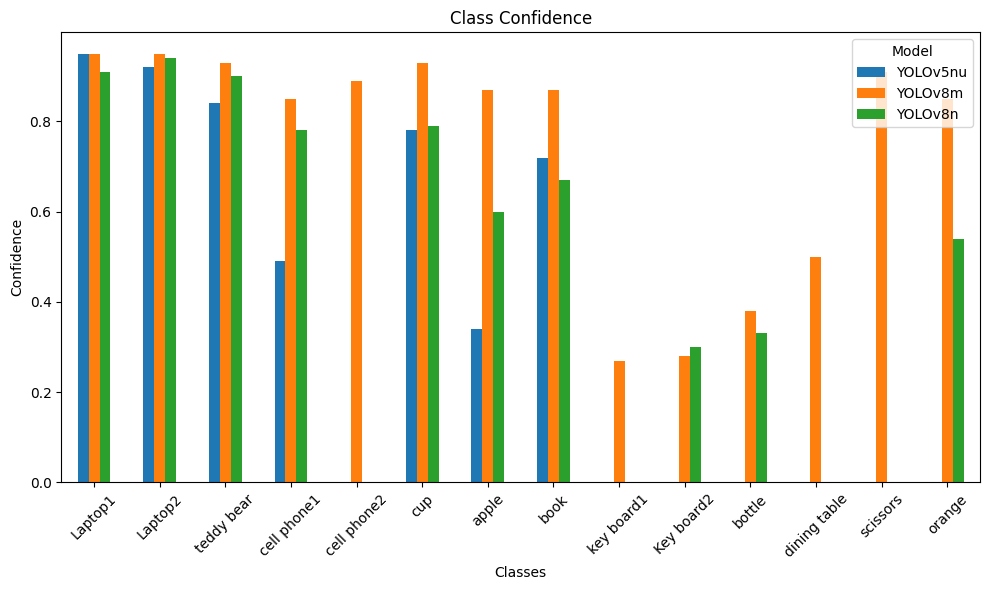

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

perf_data = {
    "Model": [ "YOLOv5nu", "YOLOv8m", "YOLOv8n"],
    "Laptop1": [0.95, 0.95, 0.91],
    "Laptop2": [0.92, 0.95, 0.94],
    "teddy bear": [0.84, 0.93, 0.90],
    "cell phone1": [0.49, 0.85, 0.78],
    "cell phone2": [None, 0.89, None],
    "cup": [0.78, 0.93, 0.79],
    "apple": [0.34, 0.87, 0.60],
    "book": [0.72, 0.87, 0.67],
    "key board1": [None, 0.27, None],
    "Key board2": [None, 0.28, 0.30],
    "bottle": [None, 0.38,0.33],
    "dining table": [None, 0.50, None],
    "scissors": [None, 0.91, None],
    "orange": [None, 0.85, 0.54],

}
# do transpose so that the models become columns
perf_df = pd.DataFrame(perf_data).set_index("Model").T

# droping the NA values
line_df = perf_df.dropna()

colors = ['#90EE90','#ADD8E6', '#FFC0CB']

# showing bar plot for class confidence of 3 different models 5nu,8m,8n
perf_df.plot(kind='bar', figsize=(10, 6))
plt.title('Class Confidence')
plt.ylabel('Confidence')
plt.xlabel('Classes')
plt.xticks(rotation=45)
plt.legend(title='Model')
plt.tight_layout()
plt.show()